<a href="https://colab.research.google.com/github/haydarsenoll/Preprocessing-/blob/main/FasterRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision

import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import  cv2_imshow

2.4.1+cu121
0.19.1+cu121


In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 81.4MB/s]


In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
!wget '/content/8017130856_1b46b5f5fc_z.jpg'

/content/8017130856_1b46b5f5fc_z.jpg: Scheme missing.


In [6]:
Ig = Image.open("/content/8017130856_1b46b5f5fc_z.jpg")

In [7]:
transform = T.ToTensor() #T.ToTensor() fonksiyonu, bir görüntüyü NumPy dizisinden PyTorch tensoruna dönüştürmek için kullanılır

In [8]:
img = transform(Ig)

In [9]:
with torch.no_grad():
  pred = model([img])

In [10]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [11]:
boxes , labels ,scores = pred[0]["boxes"] , pred[0]["labels"] , pred[0]["scores"]

In [12]:
scores

tensor([0.9945, 0.9943, 0.9819, 0.9267, 0.8957, 0.8950, 0.8255, 0.7763, 0.6146,
        0.6001, 0.4682, 0.4440, 0.3859, 0.3845, 0.3429, 0.3022, 0.1853, 0.1789,
        0.1679, 0.1426, 0.1195, 0.1179, 0.1161, 0.0988, 0.0946, 0.0946, 0.0925,
        0.0872, 0.0797, 0.0741, 0.0741, 0.0735, 0.0731, 0.0712, 0.0663, 0.0588,
        0.0535, 0.0530, 0.0521, 0.0520, 0.0519])

In [13]:
num = torch.argwhere(scores > 0.9).shape[0]

In [14]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [15]:
igg = cv2.imread("/content/8017130856_1b46b5f5fc_z.jpg")
for i in range(num):
  x1 , y1 , x2 ,y2 = boxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.rectangle(igg , (x1,y1) , (x2,y2),(0,255,0),1)
  igg = cv2.putText(igg, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

In [16]:
boxes

tensor([[4.3915e+01, 1.0711e+02, 3.5566e+02, 5.7748e+02],
        [3.0363e+02, 2.8740e+02, 4.8665e+02, 5.7608e+02],
        [3.2970e+02, 9.6227e+01, 5.1610e+02, 2.8880e+02],
        [3.1138e+02, 1.2653e+02, 4.0740e+02, 2.9439e+02],
        [3.8528e+02, 1.6346e+02, 4.0925e+02, 1.9929e+02],
        [7.7811e+01, 2.8156e+02, 1.4569e+02, 3.7997e+02],
        [0.0000e+00, 3.9561e+02, 1.3848e+02, 4.3830e+02],
        [2.2833e+02, 3.5430e+01, 5.1800e+02, 3.6300e+02],
        [9.1304e-01, 3.8035e+02, 6.3555e+01, 3.9922e+02],
        [4.6996e+01, 2.8340e+02, 1.1611e+02, 3.7868e+02],
        [1.0534e+02, 2.5328e+02, 4.6215e+02, 5.8485e+02],
        [3.8943e+02, 1.6165e+02, 5.1570e+02, 2.8571e+02],
        [3.1031e+02, 1.3040e+02, 4.0976e+02, 2.9703e+02],
        [4.5286e+01, 2.8932e+02, 8.2743e+01, 3.7436e+02],
        [0.0000e+00, 3.7739e+02, 1.3380e+02, 4.1714e+02],
        [0.0000e+00, 3.8769e+02, 1.3552e+02, 4.0607e+02],
        [2.4437e+02, 1.1571e+02, 5.0210e+02, 5.5934e+02],
        [4.293

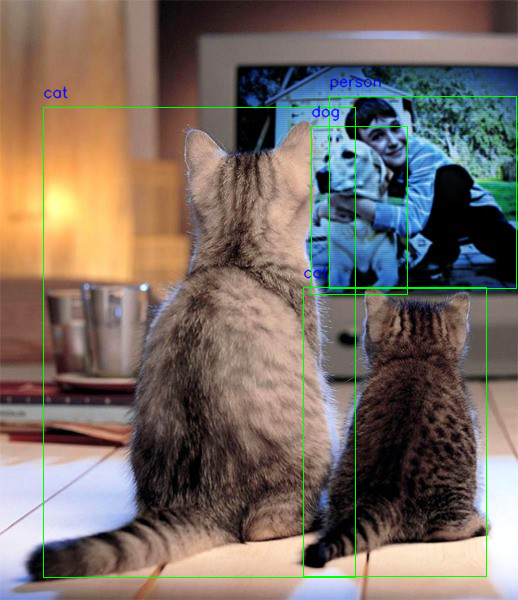

In [17]:
cv2_imshow(igg)